In [12]:
import numpy as np
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit_ibm_provider import IBMProvider
from qiskit import transpile
import matplotlib.pyplot as plt


In [5]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

qc = QuantumCircuit(qr, cr)

# apply 10 Hadamard gates in series
for i in range(10):
    qc.h(qr)

qc.measure(qr, cr)
qc.draw(fold=-1)

┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌─┐
  q0: ┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤ H ├┤M├
      └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└╥┘
c0: 1/═══════════════════════════════════════════════════╩═
                                                         0

# We'll run it on the 7 qubit `'ibm_nairobi'`, whose coupling map is

```
    0--1--2
       |
       3
       |
    4--5--6
```

In [6]:
provider = IBMProvider()
backend = provider.get_backend('ibm_lagos')

initial_layout = [0]
transpiled_qc = transpile(qc, backend=backend, initial_layout=initial_layout, optimization_level=0)
transpiled_qc.draw(fold=-1)

global phase: π/2
               ┌─────────┐┌────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─────────┐┌────┐┌─────────┐┌─┐
     q0_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├┤M├
               └─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└─────────┘└────┘└─────────┘└╥┘
ancilla_0 -> 1 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫─
                                                                                                                                                                                                                                                                                                        ║ 
ancilla_1 -> 2 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫─
                                                                                                                                                                                                                                                                                                        ║ 
ancilla_2 -> 3 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫─
                                                                                                                                                                                                                                                                                                        ║ 
ancilla_3 -> 4 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫─
                                                                                                                                                                                                                                                                                                        ║ 
ancilla_4 -> 5 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╫─
                                                                                                                                                                                                                                                                                                        ║ 
ancilla_5 -> 6 ────────────────────────────────────────────────────────────────────────────────

# Submit job

In [43]:
job_id = backend.run(transpiled_qc, shots=1e2, meas_level=1, meas_return='single' ).job_id() # with meas_level=0 no memory but counts, with meas_level=1 memory of IQ data & no counts

# Check the job

In [44]:
job_id = "cmdermate72g008js3n0"

In [45]:
print(job_id) # cmdermate72g008js3n0
job = provider.retrieve_job(job_id)
job.status()

cmdermate72g008js3n0


<JobStatus.DONE: 'job has successfully run'>

# Get the data

## Data types on IBM Quantum backends¶

IBM Quantum backends can return different types of data. There is counts data and IQ data [1], referred to as level 2 and level 1 data, respectively. Level 2 data corresponds to a dictionary with bit-strings as keys and the number of times the bit-string was measured as a value. Importantly for some experiments, the backends can return a lower data level known as IQ data. Here, I and Q stand for in phase and quadrature. The IQ are points in the complex plane corresponding to a time integrated measurement signal which is reflected or transmitted through the readout resonator depending on the setup. IQ data can be returned as “single” or “averaged” data. Here, single means that the outcome of each single shot is returned while average only returns the average of the IQ points over the measured shots. The type of data that an experiment should return is specified by the run_options() of an experiment.



In [46]:
# if meas_level=0

counts = job.result().get_counts()
counts

QiskitError: 'No counts for experiment "0"'

In [ ]:
# if meas_level=1

memory = job.result().get_memory()
print(np.shape(memory))
memory

(100, 1)


array([[-7.46476110e+07-9.96593040e+07j],
       [-6.25208600e+07-6.04884430e+07j],
       [-7.61014490e+07-6.01415910e+07j],
       [-6.75694040e+07-6.05329790e+07j],
       [-7.40848660e+07-7.54990510e+07j],
       [-8.34976050e+07-8.83604590e+07j],
       [-5.08339470e+07-6.90315080e+07j],
       [-7.95990940e+07-6.95494500e+07j],
       [-5.76551470e+07-1.19330069e+08j],
       [-8.12622740e+07-1.06579394e+08j],
       [-6.31456800e+07-8.83405760e+07j],
       [-6.77085570e+07-7.62462840e+07j],
       [-2.15542030e+07-7.01216210e+07j],
       [-7.56855020e+07-7.93940400e+07j],
       [-1.26120700e+08-7.82285750e+07j],
       [-7.97942560e+07-6.94108990e+07j],
       [-8.34794230e+07-6.71395080e+07j],
       [-5.76775020e+07-6.84898340e+07j],
       [-4.71013980e+07-6.98736190e+07j],
       [-6.26802610e+07-6.94177260e+07j],
       [-8.28575980e+07-8.29400740e+07j],
       [-5.86241800e+07-9.36209270e+07j],
       [-1.22046530e+07-4.47998990e+07j],
       [-3.63975400e+07-5.23845480

# Plot the IQ plane

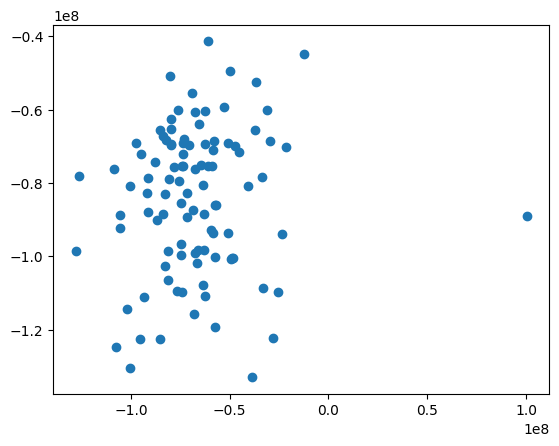

In [ ]:
# Plotting
import matplotlib.pyplot as plt


plt.plot(np.real(memory), np.imag(memory), 'o')



# Repeat but with 50/50 0 & 1

In [ ]:
qc5050 = QuantumCircuit(qr, cr)

qc5050.rx(np.pi/2, qr)
qc5050.measure(qr, cr)

qc5050.draw(fold=-1)

initial_layout = [0]
transpiled_qc5050 = transpile(qc5050, backend=backend, initial_layout=initial_layout)
transpiled_qc5050.draw(fold=-1)

job_id = backend.run(transpiled_qc5050, shots=1e2, meas_level=1, meas_return='single' ).job_id()

## Analyse data


`Job ids:`

"cmdewdsy4c00008hxr80" : 10 Hadamards, optimize 0, had 97/3 0/1 NAIROBI

"cmdf848zjkb0008m27cg" : pi/2 Puls LAGOS

In [7]:
job_id5050 = "cmdf848zjkb0008m27cg"
job5050 = provider.retrieve_job(job_id5050)
memory5050 = job.result().get_memory()

job_id0 = "cmdewdsy4c00008hxr80"
job0 = provider.retrieve_job(job_id0)
memory0 = job0.result().get_memory()


NameError: name 'job' is not defined

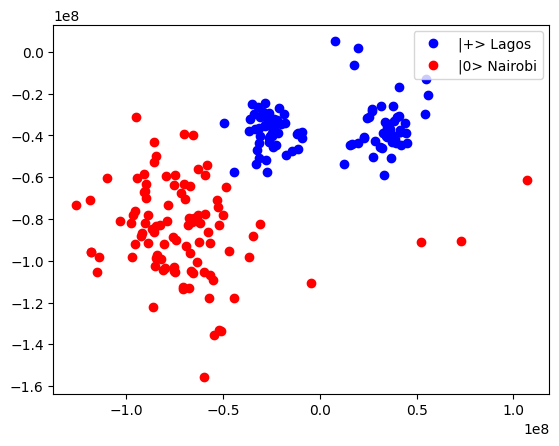

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.real(memory5050), np.imag(memory5050), 'o', color='blue')
plt.plot(np.real(memory0), np.imag(memory0), 'o', color='red')

# Legend
plt.plot([], [], 'o', color='blue', label='|+> Lagos')
plt.plot([], [], 'o', color='red', label='|0> Nairobi')
plt.legend()


# Using the IQ Plotter

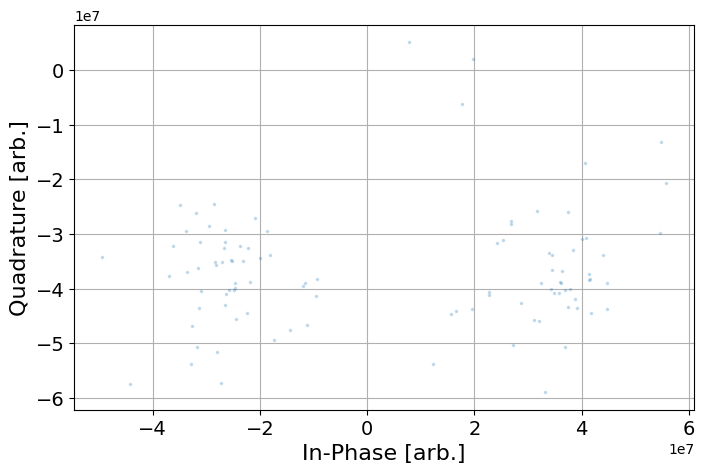

In [ ]:
from qiskit_experiments.visualization import IQPlotter, MplDrawer

plotter = IQPlotter(MplDrawer())

# Convert memory data to a 2D numpy array for the IQPlotter
def prepare_memory_for_plot(memory):
    return np.array([[point.real, point.imag] for point in memory])

# Prepare memory data
prepared_memory5050 = prepare_memory_for_plot(memory5050)
prepared_memory0 = prepare_memory_for_plot(memory0)

# Set series data
plotter.set_series_data(
    "Circuit 5050",
    points=prepared_memory5050
)


# Display the figure
plotter.figure()    



# Check if the magitudes stay the same for the same hardware

In [10]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)

qc.rx(np.pi/2, qr)
qc.measure(qr, cr)

provider = IBMProvider()
backend = provider.get_backend('ibm_lagos')

transpiled_qc = transpile(qc, backend=backend)

job_id = backend.run(transpiled_qc, shots=1e2, meas_level=1, meas_return='single' ).job_id()


In [9]:
job_id = "cmdx038te72g008jshg0"
print(job_id) #"cmdx038te72g008jshg0"
job = provider.retrieve_job(job_id)
job.status()

cmdx038te72g008jshg0


<JobStatus.DONE: 'job has successfully run'>

NameError: name 'memory5050' is not defined

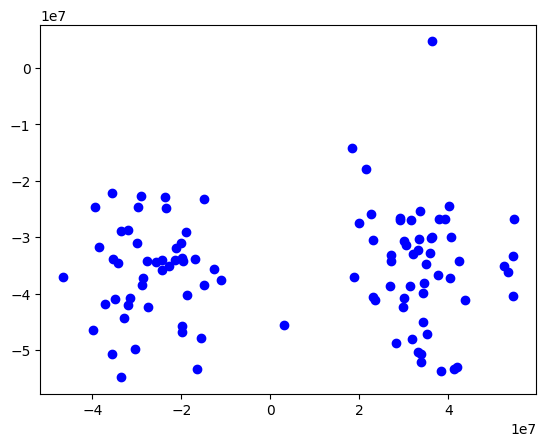

In [13]:
memory = job.result().get_memory()

plt.plot(np.real(memory), np.imag(memory), 'o', color='blue', label='|+> Lagos 03.10')
plt.plot(np.real(memory5050), np.imag(memory5050), 'o', color='red', label='|+> Lagos 02.09')

plt.legend()

In [16]:
print(np.shape(memory))
print(memory)

(100, 1)
[[-29709214.-24567884.j]
 [-20004889.-31007195.j]
 [ 29916244.-42390490.j]
 [-31628558.-40718596.j]
 [-35493396.-22127831.j]
 [-21308926.-31884996.j]
 [-19831143.-46678170.j]
 [-14798990.-38453310.j]
 [-19556266.-34203540.j]
 [-22683068.-35142091.j]
 [ 31772913.-47908812.j]
 [-23372274.-24800375.j]
 [ 33930681.-50681106.j]
 [  3096770.-45505689.j]
 [ 39172212.-26716394.j]
 [-35442161.-33752010.j]
 [ 42426638.-34262313.j]
 [ 35911314.-32695832.j]
 [ 40378175.-37156920.j]
 [ 33576312.-25256299.j]
 [ 36237145. +4703794.j]
 [-18755878.-40174368.j]
 [ 29940142.-30710533.j]
 [-24315570.-34006498.j]
 [-27411822.-42358419.j]
 [-29138819.-22688133.j]
 [ 30382826.-31431000.j]
 [-23693336.-22818450.j]
 [-33470291.-28889458.j]
 [ 33968655.-52122990.j]
 [-30497790.-49798818.j]
 [ 34400575.-44904018.j]
 [ 27060780.-33052160.j]
 [-33465518.-54779662.j]
 [ 54687072.-26738999.j]
 [-39887965.-46476997.j]
 [-39425225.-24613136.j]
 [-16867331.-33802552.j]
 [-28817179.-38455245.j]
 [ 41299337.-532